In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, precision_score

In [2]:
data=pd.read_csv("kepler_data.csv")


In [3]:
data

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


### Basic checks

In [4]:
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
data.tail()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998
9563,10156110,K07989.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,1,...,-225.0,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [7]:
data.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [8]:
data.describe(include="O")

,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_tce_delivname
count,9564,2360,9564,9564,9218
unique,9564,2360,3,2,3
top,K00752.01,Kepler-227 b,FALSE POSITIVE,FALSE POSITIVE,q1_q17_dr25_tce
freq,1,1,4840,4847,8054


In [9]:
data.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name          7204
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

In [10]:
data.duplicated().sum()

0

In [11]:
data.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [12]:
data.dtypes

kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr 

In [13]:
data.shape

(9564, 49)

In [14]:
data.size

468636

In [15]:
data.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name          7204
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

In [16]:
#eliminate records having more than 100 missings
data=data.loc[:,data.isnull().sum()<=100]

In [17]:

# Replace the missing value in the 'koi_kepmag' column with the column mean
data['koi_kepmag']=data['koi_kepmag'].fillna(data['koi_kepmag'].mean())

In [18]:
# verify the imputing
data.isnull().sum()

kepid               0
kepoi_name          0
koi_disposition     0
koi_pdisposition    0
koi_fpflag_nt       0
koi_fpflag_ss       0
koi_fpflag_co       0
koi_fpflag_ec       0
koi_period          0
koi_time0bk         0
koi_duration        0
ra                  0
dec                 0
koi_kepmag          0
dtype: int64

In [19]:
# check unique values in 'koi_disposition' column
print(data['koi_disposition'].unique())

['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']


In [20]:
#map the 'koi_disposition'column
disposition_mapping={
    'CONFIRMED':0,
    'CANDIDATE':1,
    'FALSE POSITIVE':2}


In [21]:
data['koi_disposition'] = data['koi_disposition'].map(disposition_mapping)

In [22]:
#verifying the mapping of 'koi_disposition'column
print(data[['koi_disposition']].head())

   koi_disposition
0                0
1                0
2                1
3                2
4                0


In [23]:
# check the unique values in koi_disposition
print(data['koi_disposition'].unique())

[0 1 2]


In [24]:
print(data['koi_disposition'].head())

0    0
1    0
2    1
3    2
4    0
Name: koi_disposition, dtype: int64


In [25]:
# Check unique values in 'koi_pdisposition'
print(data['koi_pdisposition'].unique())

['CANDIDATE' 'FALSE POSITIVE']


In [26]:
#Check first five records in 'koi_pdisposition' column
print(data[[ 'koi_pdisposition']].head())

  koi_pdisposition
0        CANDIDATE
1        CANDIDATE
2        CANDIDATE
3   FALSE POSITIVE
4        CANDIDATE


In [27]:
# Map the 'koi_pdisposition' column
pdisposition_mapping = {
    'CANDIDATE': 0,
    'FALSE POSITIVE': 1
}

In [28]:
data['koi_pdisposition'] = data['koi_pdisposition'].map(pdisposition_mapping)

In [29]:
# Verify the maping  of 'koi_pdisposition'
print(data[[ 'koi_pdisposition']].head())

   koi_pdisposition
0                 0
1                 0
2                 0
3                 1
4                 0


In [30]:
# Check the data types of all columns
print(data.dtypes)

kepid                 int64
kepoi_name           object
koi_disposition       int64
koi_pdisposition      int64
koi_fpflag_nt         int64
koi_fpflag_ss         int64
koi_fpflag_co         int64
koi_fpflag_ec         int64
koi_period          float64
koi_time0bk         float64
koi_duration        float64
ra                  float64
dec                 float64
koi_kepmag          float64
dtype: object


In [31]:
# Drop the 'kepoi_name' column with the object data type 
data.drop(columns=['kepoi_name'], inplace=True)

In [32]:

# Confirm the column has been dropped
print(data.dtypes)
print(data.head())

kepid                 int64
koi_disposition       int64
koi_pdisposition      int64
koi_fpflag_nt         int64
koi_fpflag_ss         int64
koi_fpflag_co         int64
koi_fpflag_ec         int64
koi_period          float64
koi_time0bk         float64
koi_duration        float64
ra                  float64
dec                 float64
koi_kepmag          float64
dtype: object
      kepid  koi_disposition  koi_pdisposition  koi_fpflag_nt  koi_fpflag_ss  \
0  10797460                0                 0              0              0   
1  10797460                0                 0              0              0   
2  10811496                1                 0              0              0   
3  10848459                2                 1              0              1   
4  10854555                0                 0              0              0   

   koi_fpflag_co  koi_fpflag_ec  koi_period  koi_time0bk  koi_duration  \
0              0              0    9.488036   170.538750       2.95

In [33]:

# Summary statistics for numerical features
print(data.describe())


              kepid  koi_disposition  koi_pdisposition  koi_fpflag_nt  \
count  9.564000e+03      9564.000000       9564.000000    9564.000000   
mean   7.690628e+06         1.259515          0.506796       0.208595   
std    2.653459e+06         0.827851          0.499980       4.767290   
min    7.574500e+05         0.000000          0.000000       0.000000   
25%    5.556034e+06         1.000000          0.000000       0.000000   
50%    7.906892e+06         2.000000          1.000000       0.000000   
75%    9.873066e+06         2.000000          1.000000       0.000000   
max    1.293514e+07         2.000000          1.000000     465.000000   

       koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec     koi_period  \
count    9564.000000    9564.000000    9564.000000    9564.000000   
mean        0.232748       0.197512       0.120033      75.671358   
std         0.422605       0.398142       0.325018    1334.744046   
min         0.000000       0.000000       0.000000       0.241843 

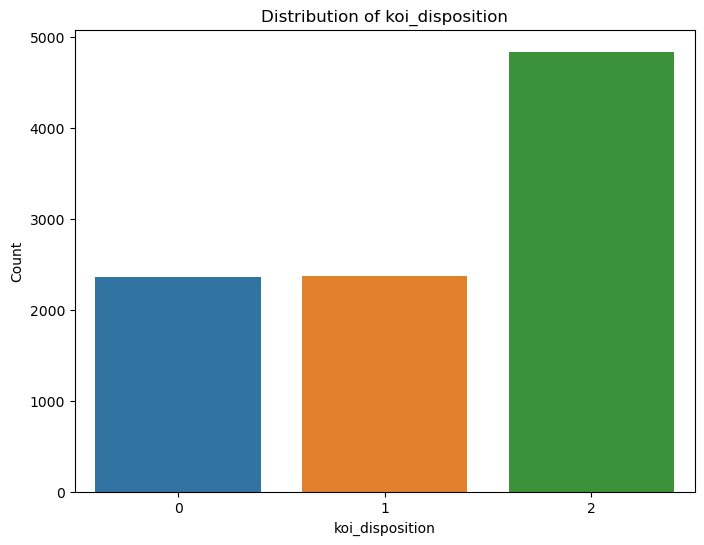

In [34]:
# Distribution of the target variable 'koi_disposition'
plt.figure(figsize=(8, 6))
sns.countplot(x='koi_disposition', data=data)
plt.title('Distribution of koi_disposition')
plt.xlabel('koi_disposition')
plt.ylabel('Count')
plt.show()


Text(0, 0.5, 'Count')

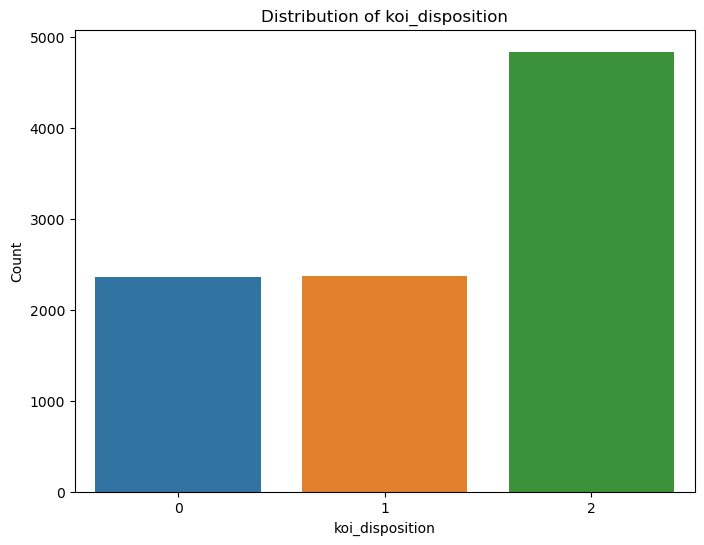

In [35]:
# Bar plot distribution of the target variable 'koi_disposition'
plt.figure(figsize=(8, 6))
sns.countplot(x='koi_disposition', data=data)
plt.title('Distribution of koi_disposition')
plt.xlabel('koi_disposition')
plt.ylabel('Count')

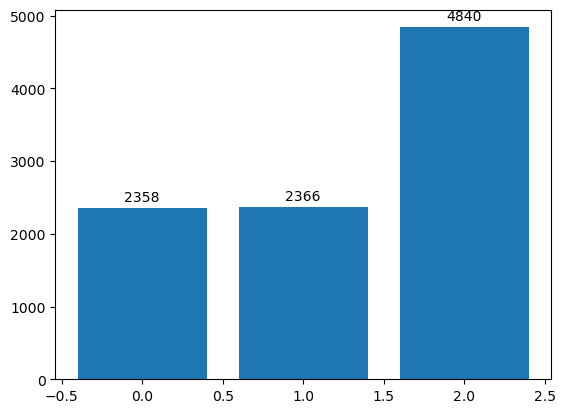

In [36]:
import matplotlib.pyplot as plt

# Assuming you have already defined `data` and imported necessary libraries

# Get the value counts
counts = data['koi_disposition'].value_counts()

# Plotting the bar chart
plt.bar(counts.index, counts)

# Adding counts on top of bars
for category, count in counts.items():
    plt.annotate(str(count), xy=(category, count), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')

plt.show()


In [37]:

numerical_features = ['kepid', 'koi_pdisposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_duration', 'ra', 'dec', 'koi_kepmag']

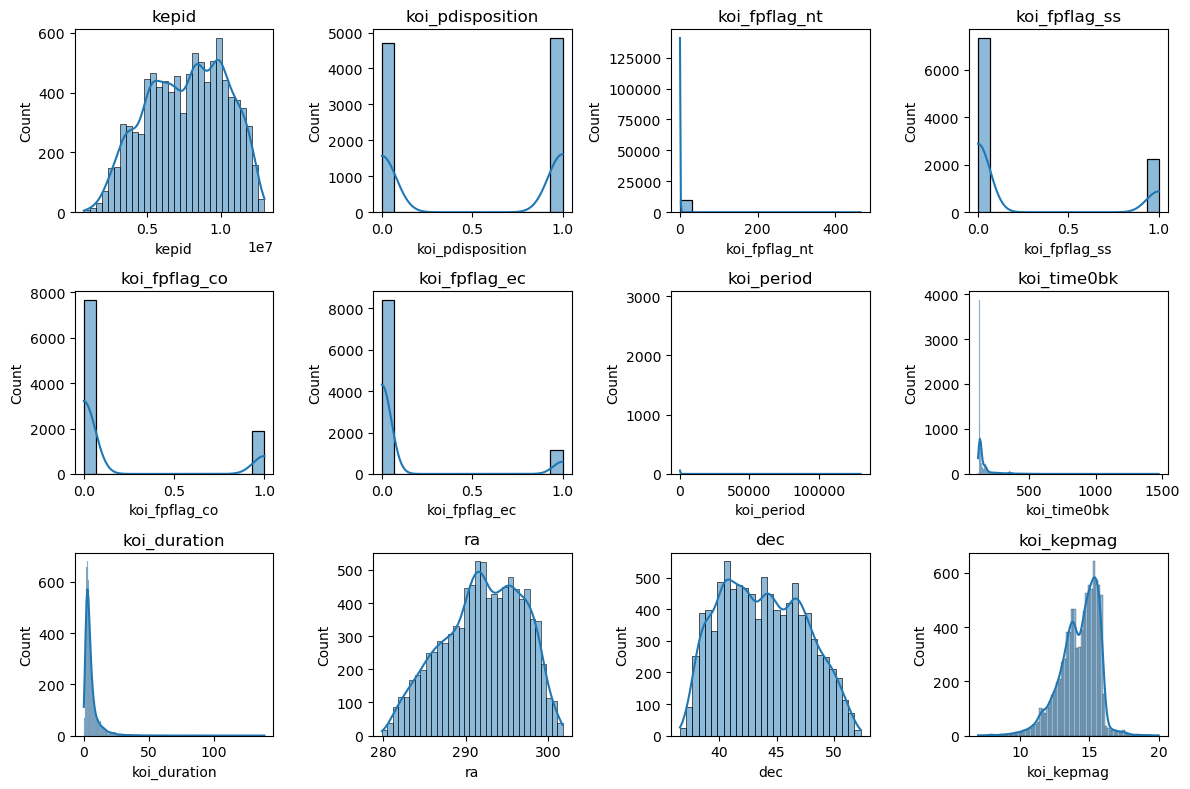

In [38]:

# Visualize the distribution of numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [39]:
# Calculate correlation coefficients
correlation = data.corr()['koi_disposition'].sort_values(ascending=False)
print(correlation)

koi_disposition     1.000000
koi_pdisposition    0.902714
koi_fpflag_ss       0.483708
koi_fpflag_co       0.443776
koi_fpflag_ec       0.330373
ra                  0.155793
koi_duration        0.147215
koi_time0bk         0.031045
koi_fpflag_nt       0.014368
koi_period          0.005875
koi_kepmag         -0.048420
kepid              -0.110403
dec                -0.111738
Name: koi_disposition, dtype: float64


In [40]:
# Features and target variable
X = data[['koi_pdisposition', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'ra', 'koi_duration', 'koi_time0bk', 'koi_fpflag_nt', 'koi_period']]
y = data['koi_disposition']


In [41]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (7651, 9) (7651,)
Testing data shape: (1913, 9) (1913,)


In [42]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(C=1, solver= 'lbfgs', max_iter=5000, random_state=42)
logistic_regression.fit(X_train, y_train)


LogisticRegression(C=1, max_iter=5000, random_state=42)

In [43]:
# Predict on the testing data
y_pred_lr = logistic_regression.predict(X_test)

In [44]:
# EVALUATE THE MODEL
print("Logistic regression Model:")
print("Accuracy:",accuracy_score(y_test,y_pred_lr))
print("precision:",precision_score(y_test,y_pred_lr,average='micro'))
print("classification Report:\n",classification_report(y_test,y_pred_lr))

Logistic regression Model:
Accuracy: 0.7982226868792472
precision: 0.7982226868792472
classification Report:
               precision    recall  f1-score   support

           0       0.57      0.86      0.69       490
           1       0.72      0.34      0.46       484
           2       1.00      1.00      1.00       939

    accuracy                           0.80      1913
   macro avg       0.76      0.73      0.72      1913
weighted avg       0.82      0.80      0.78      1913



In [45]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test,  y_pred_lr)

In [46]:
# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[423  65   2]
 [319 165   0]
 [  0   0 939]]


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Train Random Forest model
random_forest = RandomForestClassifier(
    n_estimators= 250,       # Number of trees
    max_depth=10,           # Maximum depth of each tree
    min_samples_split=6,    # Minimum samples to split an internal node
    min_samples_leaf=1,     # Minimum samples at a leaf node
    max_features='sqrt',    # Number of features to consider at each split
    bootstrap=True,         # Whether bootstrap samples are used
    random_state=42         # Seed for reproducibility
)

random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=250,
                       random_state=42)

In [49]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=250,
                       random_state=42)

In [50]:
# Predict on the testing data
y_pred_rf = random_forest.predict(X_test)


In [51]:
# Evaluate the model
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average= 'weighted'))

Random Forest Model:
Accuracy: 0.8269733403031887
Precision: 0.8311167505512991


In [52]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test,  y_pred_rf)

In [53]:
# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[380 108   2]
 [221 263   0]
 [  0   0 939]]


In [54]:
#calculate and display classifiction report
print("\nClassification Report:")
print("Classification Report:\n",classification_report(y_test,y_pred_rf))


Classification Report:
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.78      0.70       490
           1       0.71      0.54      0.62       484
           2       1.00      1.00      1.00       939

    accuracy                           0.83      1913
   macro avg       0.78      0.77      0.77      1913
weighted avg       0.83      0.83      0.82      1913



In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient boosting model
gbrt = GradientBoostingClassifier(n_estimators=200, random_state=0, max_depth=4, learning_rate=0.1)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=0)

In [56]:
errors = [mean_squared_error(y_test, y_pred)
 for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingClassifier(max_depth=4,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=4, n_estimators=109)

In [57]:

# Predict on the testing data
y_pred_gbrt = gbrt_best.predict(X_test)

# Evaluate the model
print("Gradient Boosting Model(GBRT) Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbrt))
print("Precision:", precision_score(y_test, y_pred_gbrt, average= 'micro'))
print("Classification Report:\n", classification_report(y_test, y_pred_gbrt))


Gradient Boosting Model(GBRT) Model:
Accuracy: 0.8269733403031887
Precision: 0.8269733403031887
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.73      0.68       490
           1       0.68      0.59      0.64       484
           2       1.00      1.00      1.00       939

    accuracy                           0.83      1913
   macro avg       0.78      0.77      0.77      1913
weighted avg       0.83      0.83      0.83      1913



In [58]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gbrt)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[356 132   2]
 [197 287   0]
 [  0   0 939]]


In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [76]:
y_pred_knn=knn.predict(X_test)
y_train_pred_knn=knn.predict(X_train)

In [77]:
print("KNeighbors Classifier Model:")
print("Accuracy:",accuracy_score(y_test,y_pred_knn))
print("Precision:",precision_score(y_test,y_pred_knn,average='weighted'))

KNeighbors Classifier Model:
Accuracy: 0.6293779404077365
Precision: 0.6484809814343384


In [78]:
from sklearn.metrics import accuracy_score, precision_score

# Assuming y_test and y_pred_knn are defined elsewhere in your code
print("KNeighbors Classifier Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))


KNeighbors Classifier Model:
Accuracy: 0.6293779404077365
Precision: 0.6484809814343384


In [79]:
print("Classification Report:\n",classification_report(y_test,y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.62      0.54       490
           1       0.44      0.42      0.43       484
           2       0.84      0.74      0.79       939

    accuracy                           0.63      1913
   macro avg       0.59      0.59      0.59      1913
weighted avg       0.65      0.63      0.64      1913



In [80]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[302 148  40]
 [186 204  94]
 [131 110 698]]


In [81]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [82]:
y_train_pred_sv=svc.predict(X_train)
y_pred_sv=svc.predict(X_test)

In [85]:
# Evaluate the model
print("Support Vector Machine Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_sv))
print("Precision:", precision_score(y_test, y_pred_sv, average= 'weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred_sv))


Support Vector Machine Model:
Accuracy: 0.4913748039728176
Precision: 0.4940675120897099
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       490
           1       1.00      0.00      0.00       484
           2       0.49      1.00      0.66       939

    accuracy                           0.49      1913
   macro avg       0.50      0.33      0.22      1913
weighted avg       0.49      0.49      0.32      1913



In [87]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_sv)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)




Confusion Matrix:
[[  0   0 490]
 [  0   1 483]
 [  0   0 939]]


In [89]:
# Importing cross_val_score from 'sklearn.model_selection'.
from sklearn.model_selection import cross_val_score

# It will calculate cross-validation scores for SVM classification using 3 folds and accuracy as the scoring metric. 
scores = cross_val_score(svc, X, y, cv = 5, scoring = 'accuracy', verbose = 3, n_jobs = -1)

# It will print the individual cross-validation scores.
print(scores)

# It will print the mean cross-validation score.
print("Cross validation Score:", scores.mean())

# It will print the standard deviation of the cross-validation scores.
print("Std :", scores.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.0s remaining:   13.6s


[0.45007841 0.50653424 0.5060115  0.5060115  0.50627615]
Cross validation Score: 0.49498236028757214
Std : 0.02245281337276345


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.8s finished


In [90]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'] }

model = SVC()
grid = GridSearchCV(model, param_grid, scoring = 'accuracy', cv = 5, verbose = 2)

In [92]:
# fitting the model for grid search

grid.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  17.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  17.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  17.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  16.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  17.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  12.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  13.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  13.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  13.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  13.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=  10.7s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [93]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_score_)

{'C': 70, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7710161371107617


In [95]:
model = SVC(C = 70, gamma = 0.0001, kernel = 'rbf', random_state = 42)
model.fit(X_train, y_train)

SVC(C=70, gamma=0.0001, random_state=42)

In [96]:
y_svc_train_pred = model.predict(X_train) # training model
y_svc_test_pred = model.predict(X_test) # testing model

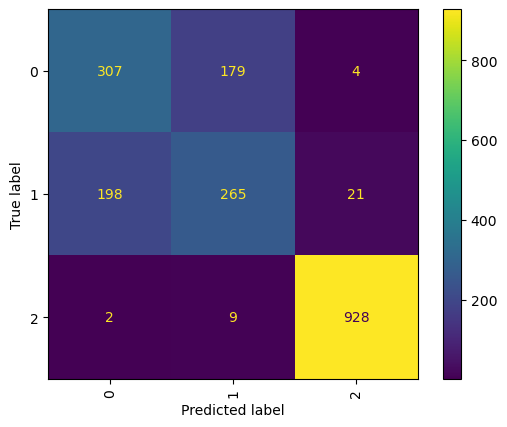

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_svc_test_pred, xticks_rotation='vertical')

In [99]:
print("The training score is: ", accuracy_score(y_train, y_svc_train_pred))
print("The testing score is: ", accuracy_score(y_test, y_svc_test_pred))

The training score is:  0.815056855313031
The testing score is:  0.7841087297438578


In [100]:
# It will calculate the accuracy score for SVM Classifier on the testing set. 
svc_accuracy = accuracy_score(y_test,  y_svc_test_pred)

# It will display the calculated accuracy score.
svc_accuracy

0.7841087297438578

In [103]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 495.5 kB/s eta 0:03:22
   ---------------------------------------- 0.1/99.8 MB 1.0 MB/s eta 0:01:37
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:34
   ---------------------------------------- 0.2/99.8 MB 876.1 kB/s eta 0:01:54
   ---------------------------------------- 0.2/99.8 MB 860.2 kB/s eta 0:01:56
   ---------------------------------------- 0.3/99.8 MB 874.6 kB/s eta 0:01:54
   ---------------------------------------- 0.3/99.8 MB 863.3 kB/s eta 0:01:56
   ---------------------------------------- 0.3/99.8 MB 912.8 kB/s eta 0:01:49
   ---------------------------------------- 0.4/99.8 MB 913.9 kB/s eta 0:01:49
   ---------------------------------------- 0.5/99.8 MB 930.9 kB/s eta 0:01:47
   ---------------------------------------- 0.5/99.8 MB 954.4 kB/s eta 0:0

In [104]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [105]:
# Importing the XGBClassifier fromthe xgboost library.
from xgboost import XGBClassifier

# Creating a XGBClassifier instance.
xgb = XGBClassifier()

# Training the model with the training data i.e, 'x_train' and 'y_train'.
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [106]:
# Making predictions on the training data using the tarined XGBClassifier.
y_train_pred_XGB = xgb.predict(X_train)

# Making predictions on the test data using the trained XGBClassifier.
y_test_pred_XGB = xgb.predict(X_test)

In [107]:
# Evaluate the model
print("XGB Model:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_XGB))
print("Precision:", precision_score(y_test, y_test_pred_XGB, average= 'weighted'))
print("Classification Report:\n", classification_report(y_test, y_test_pred_XGB))

XGB Model:
Accuracy: 0.8170412963930999
Precision: 0.8167784882362278
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       490
           1       0.65      0.62      0.63       484
           2       1.00      1.00      1.00       939

    accuracy                           0.82      1913
   macro avg       0.76      0.76      0.76      1913
weighted avg       0.82      0.82      0.82      1913



In [108]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_XGB)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[325 163   2]
 [185 299   0]
 [  0   0 939]]


In [109]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have defined y_pred_lr, y_pred_rf, and y_pred_gbrt earlier in your code

# We are creating the DataFrame to compare model performance.
Model_Comparison = pd.DataFrame ({
    
    'Model' : [
        'Logistic Regressor ()',
        'Random Forest Classifier ()',
        'Gradient Boosting Classifier ()',
          'KNeighbors Classifier Model()',
        'Support Vector Machine Model()',
        'Xtreme Gradient Boosting Model()',
    ],

    'Test Score': [
        accuracy_score(y_test, y_pred_lr),  # Assuming y_pred_lr is defined
        accuracy_score(y_test, y_pred_rf),  # Assuming y_pred_rf is defined
        accuracy_score(y_test, y_pred_gbrt),  # Assuming y_pred_gbrt is defined
        accuracy_score(y_test,y_pred_knn),
        accuracy_score(y_test,y_svc_test_pred),
        accuracy_score(y_test,y_test_pred_XGB),
    ]
})

# Adjusting the index to start from 1.
Model_Comparison.index = Model_Comparison.index + 1

# It will display the DataFrame.
Model_Comparison


,Model,Test Score
1,Logistic Regressor (),0.798223
2,Random Forest Classifier (),0.826973
3,Gradient Boosting Classifier (),0.826973
4,KNeighbors Classifier Model(),0.629378
5,Support Vector Machine Model(),0.784109
6,Xtreme Gradient Boosting Model(),0.817041


### Conclusion

- Here Random Forest and Gradient Boosting Giving the same accuracy:0.8269
- Here i choose Gradient Boosting Algorithm

1. Why did you choose the particular algorithm?
Gradient boosting classifier,
Gradient boosting is a powerful algorithm for supervised learning tasks, particularly for regression and classification problems.


- High Accuracy: Gradient boosting combines weak learners to create strong ones, yielding highly accurate results.

- Handles Heterogeneous Data: Suitable for various data types (numerical, categorical), making it versatile for different datasets.

- Feature Importance: Provides insights into influential features, aiding feature selection and interpretation.

- Robustness to Overfitting: Prevents overfitting with techniques like regularization and tree pruning, even with noisy or high-dimensional data.

- Flexibility: Customizable for regression/classification tasks, with adjustable hyperparameters for optimization.

- Handles Missing Data: Can effectively handle missing data through techniques like surrogate splits.

- Wide Adoption: Popular in academia and industry for its performance and scalability, with ample community support.

In summary, gradient boosting offers accuracy, versatility, and robustness, making it a compelling choice for various machine learning tasks.

2. What are the different tuning methods used for the algorithm?
n_estimators, max_depth, learning_rate

3. Did you consider any other choice of algorithm?Why or why not?
Yes, KNN classifier and Support Vector Machines which performed poorly less than 70% accuracy , while Logistic achieved an accuracy of 78% and random forest which also achieved an accuracy of 82%.

4. What is the accuracy?
- 82%

5. What are the different types of metrics that can be used to evaluate the model?
a) Accuracy
b) Precision
c) Classification Report
d) Confusion matrix